In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import os
import matplotlib.gridspec as gridspec
import squarify
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
df = pd.read_csv('Music Sales.csv', index_col=None)
dff = pd.read_csv('Admission_Predict.csv', index_col=None)

## HeatMap

Text(0.5,1,'Heat Map')

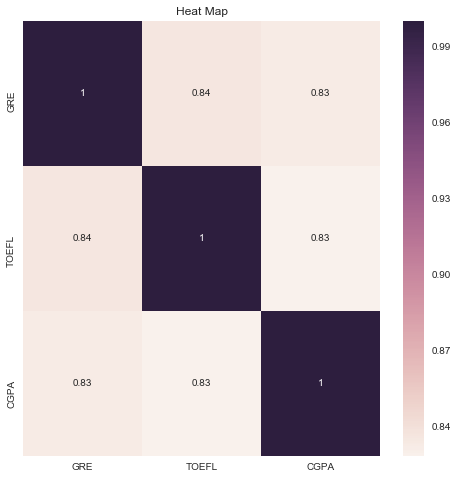

In [9]:
df1 = dff[['GRE','TOEFL','CGPA']]
#correlations calculations
correlation = df1.corr()
# Heatmap
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(correlation,annot=True)
plt.title('Heat Map')

## Distribution Plot

Text(0.5,1,'Student CGPA Distribution')

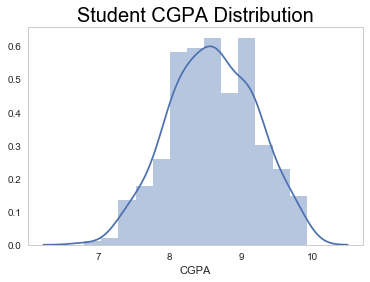

In [16]:
dff.head()
sns.distplot(dff.CGPA)
f, ax = plt.subplots(figsize=(10, 10))
sns.set_style("whitegrid", {'axes.grid' : False}) ## Reomves Grid Line
plt.title('Student CGPA Distribution', size=20,color="black")

## Pairplot

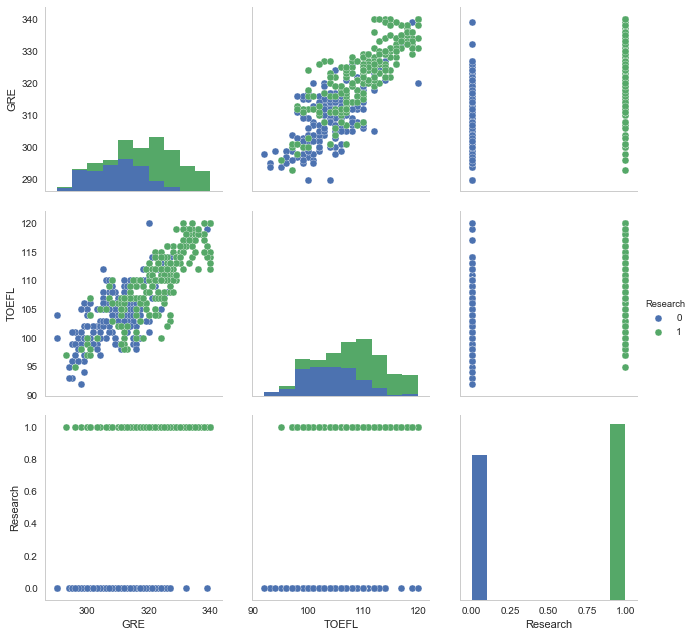

In [17]:
df11 = dff[['GRE','TOEFL','Research']]
sns.pairplot(df11, hue="Research", size=3)

## LMplot 

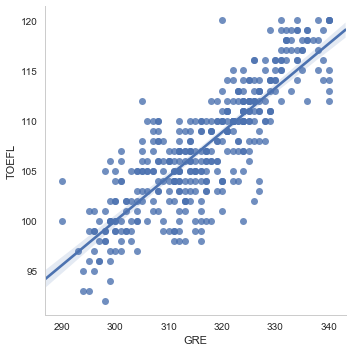

In [0]:
sns.lmplot(x='GRE', y='TOEFL', data=dff)

## Boxplot

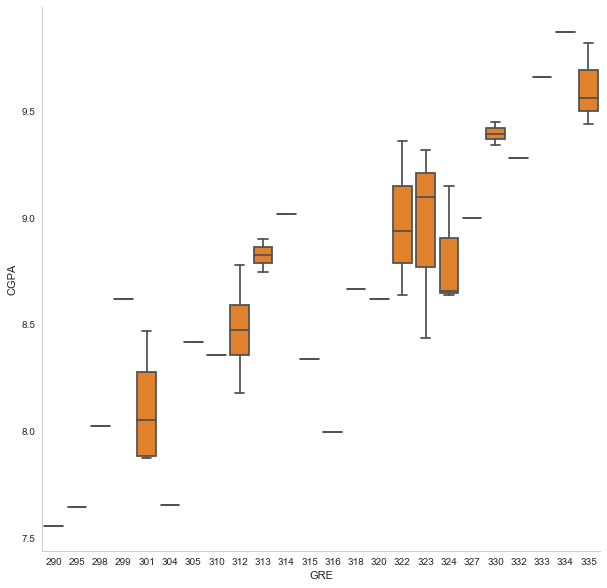

In [0]:
f, ax = plt.subplots(figsize=(10, 10))
dem = dff.sample(40)
fig = sns.boxplot(x='GRE', y="CGPA", data=dem, color='tab:Orange')
sns.despine()

## Violin Plot


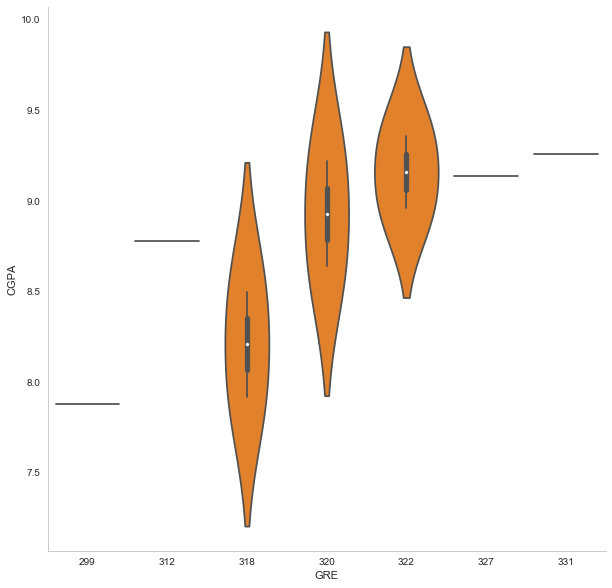

In [35]:
f, ax = plt.subplots(figsize=(10, 10))
den = dff.sample(10)
fig = sns.violinplot(x='GRE', y="CGPA", data=den, color='tab:Orange')
sns.despine()


## Scatter Plot

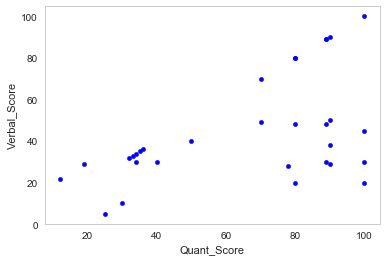

In [51]:

Scores = {'Quant_Score':[89, 90, 70, 89, 100, 80, 90, 100, 80, 34,89, 90, 70, 89, 100, 80, 90, 100, 80, 34,50,12,19,25,30,40,78,35,33,32,36],
         'Verbal_Score' : [30, 29, 49, 48, 100, 48, 38, 45, 20, 30,89, 90, 70, 89, 30, 80, 50, 20, 80, 34,40,22,29,5,10,30,28,35,33,32,36]}

Scoress = pd.DataFrame.from_dict(Scores)
Scoress.plot(kind='scatter',x='Quant_Score',y='Verbal_Score',color='blue')


In [38]:
dff.head()

,Serial No.,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Tree Plot

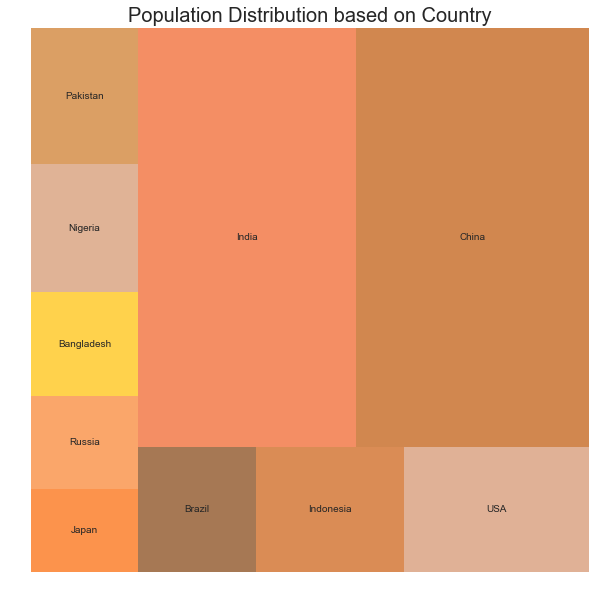

In [27]:
import squarify
colors = ["#FC6600", "#F9812B", "#FFBF00", "#D4936A","#CC7722","#813F0B","#CB5C0D","#D4916A","#F05E23","#BE5504"]
population=[126168156,142122776,159453001,195300343,207862518,208846892,262787403,329256465,1296834042,1384688986]
Country=['Japan','Russia','Bangladesh','Nigeria','Pakistan','Brazil','Indonesia','USA','India','China']
f, ax = plt.subplots(figsize=(10, 10))
plt.title('Population Distribution based on Country',size=20)
squarify.plot(sizes=population, label=Country, alpha=.7,color = colors )
plt.axis('off')
plt.show()


## Time Series Plot

<Figure size 432x288 with 0 Axes>

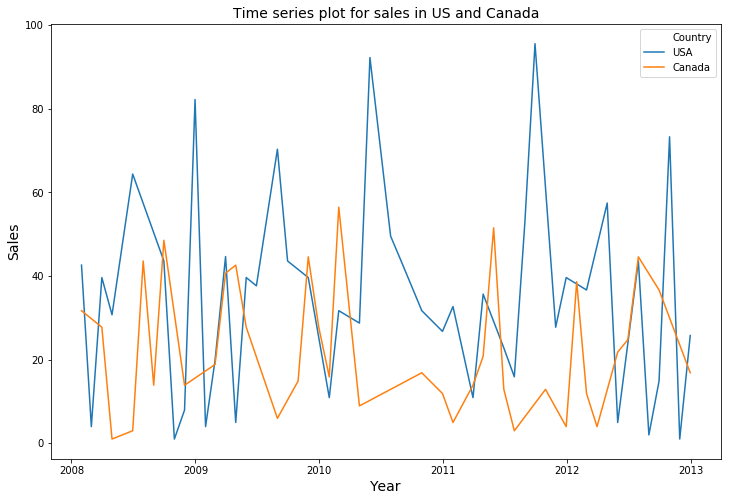

In [7]:
dataa = df
new_data = dataa.loc[:,["Sales","Country","InvoiceDate"]]

USA = new_data[(new_data.Country == 'USA') ]

Canada = new_data[(new_data.Country == 'Canada') ]

USA.index = pd.to_datetime(USA.InvoiceDate)
datam = USA.resample('M', how='sum')
datam['Country'] = 'USA'

Canada.index = pd.to_datetime(Canada.InvoiceDate)
Canada

Canada.index = pd.to_datetime(Canada.InvoiceDate)

datan = Canada.resample('M', how='sum')
datan['Country'] = 'Canada'
datan.reset_index().head(5)

result = pd.concat([datam,datan],axis = 0,ignore_index = False)
result.reset_index(inplace = True)

result['InvoiceDate1'] = pd.to_datetime(result['InvoiceDate'])
result = result[(result.sum(axis=1) != 0)]       
plt.tight_layout();
plt.figure(figsize=(12,8));
sns.lineplot(x="InvoiceDate",y="Sales",hue='Country',data=result);
plt.title('Time series plot for sales in US and Canada',Fontsize=14);
plt.xlabel('Year',fontsize=14);
plt.ylabel('Sales',fontsize=14);

In [0]:
# Data Filtration for the barchart
df_EA=df[df['Region'].isin(['Europe', 'Asia'])].copy()
df_genre = df_EA.groupby(['Genre'])['Quantity'].sum().reset_index()
df_genre.sort_values(by=['Quantity'], ascending=False, inplace=True)

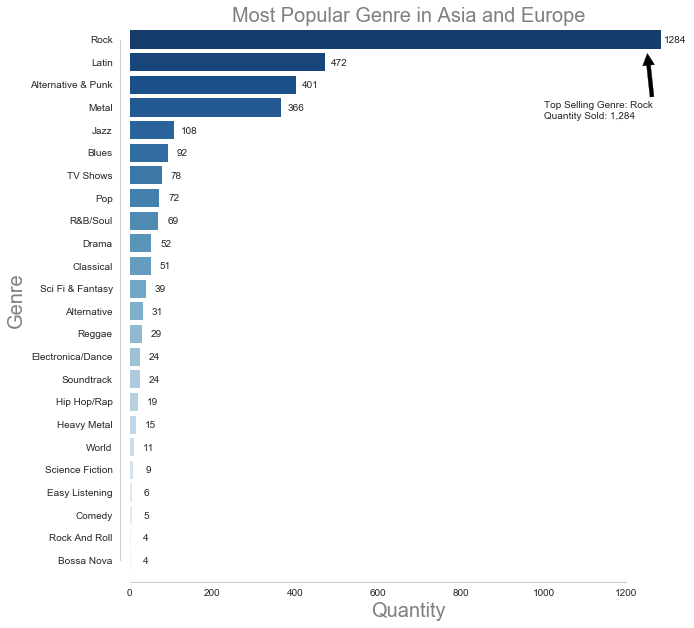

In [0]:
sns.set_style("whitegrid", {'axes.grid' : False})  ## This commands helps in avoding the grid lines
fig, ax = plt.subplots(figsize=(10,10))
ax = fig.gca()
sns.barplot(y='Genre', x='Quantity', data=df_genre, ax=ax, palette = 'Blues_r')
ax.set_title('Most Popular Genre in Asia and Europe', size=20,color="Grey")
ax.annotate('Top Selling Genre: Rock\nQuantity Sold: 1,284',xy = (1250,0.5), xytext=(1000,3.5), arrowprops=dict(facecolor='black', shrink=0.05))
ax.set_xlabel('Quantity',fontsize = 20,color="Grey")
ax.set_ylabel('Genre',fontsize = 20,color="Grey")
sns.despine(offset=10, trim=True);
for p in ax.patches:
    width = p.get_width()
    plt.text(35+p.get_width(), p.get_y()+0.55*p.get_height(),
             "{}".format(int(width)),
             ha='center', va='center')


## Stacked Bar chart

In [0]:
# get the rank of artists by quantity
df_rank = df_EA.groupby(['Artist'])['Quantity'].sum().reset_index()
df_rank['Rank'] = df_rank['Quantity'].rank(method='dense', ascending=False)
df_rank_genre = df_EA.groupby(['Artist', 'Genre'])['Quantity'].sum().reset_index()
df_rank_genre=pd.merge(df_rank_genre, df_rank[['Artist', 'Rank']], on='Artist', how='left')

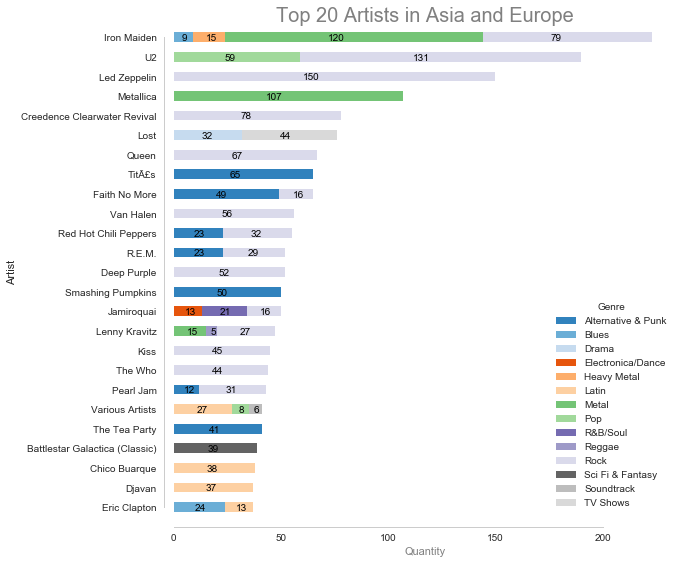

In [0]:
df_top20 = df_rank_genre.loc[df_rank_genre['Rank'] <= 20,
                             ['Artist', 'Genre', 'Quantity']].pivot(columns='Genre',
                                                                    index='Artist',
                                                                    values='Quantity')

df_top20['total'] = df_top20.sum(axis=1)
df_top20.sort_values(by=['total'], ascending=[True], inplace=True)
df_top20.drop('total', axis=1, inplace=True)
sns.set_style("whitegrid", {'axes.grid' : False})  ## This commands helps in avoding the grid lines

ax = df_top20.plot.barh(stacked=True, figsize=(9, 9), cmap=plt.cm.get_cmap('tab20c'))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if width > 0:
        ax.annotate(f'{width:.0f}', (p.get_x()+0.40*width,
                                     p.get_y()+.17*height), color='black', fontsize=10)

plt.title('Top 20 Artists in Asia and Europe', size=20,color="Grey")
plt.xlabel('Quantity',color="Grey")

sns.despine(offset=10, trim=True); ## This trims the display frames

## Tree Plot

In [0]:
df['R_sales'] = df['Quantity'] * df['UnitPrice'] # This is the new calculated field multiplied based on Quantity over unit price

In [0]:
dataa_region=df[(df.Region =='North  America') | (df.Region =='Asia') | (df.Region == 'Europe') | (df.Region == 'South America') | (df.Region == 'Oceania')] 
data_music_genre=dataa_region[['Artist','Genre','Region','R_sales']]  # select the four variables from the filtered dataframe
data_music_df=data_music_genre.groupby(['Genre','Region'])['R_sales'].sum().to_frame().sort_values(by='R_sales',ascending=False).reset_index()
data_music_df=data_music_df.groupby(['Genre','Region'])['R_sales'].sum().to_frame().sort_values(by='R_sales',ascending=False).reset_index()
data_music_dfm=data_music_df.groupby(['Region','Genre'])['R_sales'].sum().to_frame().sort_values(by='R_sales',ascending=False).reset_index()

data_music_dfmn = data_music_dfm.groupby(['Region']).head(3)

data_ASE=df[df['Region'].isin(['Europe', 'Asia'])].copy()

data_ASE=df[df['Region'].isin(['Europe', 'Asia'])].copy()
data_ASE=data_ASE[['Region','Country','Sales','UnitPrice','Quantity','R_sales']]

data_ASE=data_ASE.groupby(['Region','Country'])['R_sales'].sum().reset_index()
data_ASE.sort_values(by='R_sales',ascending=False,inplace=True)

A = data_ASE[data_ASE.Region=='Europe'].R_sales.sum()
B =data_ASE[data_ASE.Region=='Asia'].R_sales.sum()
summ =A+B
data_ASE['Percentage']=round((data_ASE['R_sales']/summ)*100,2).astype(str)

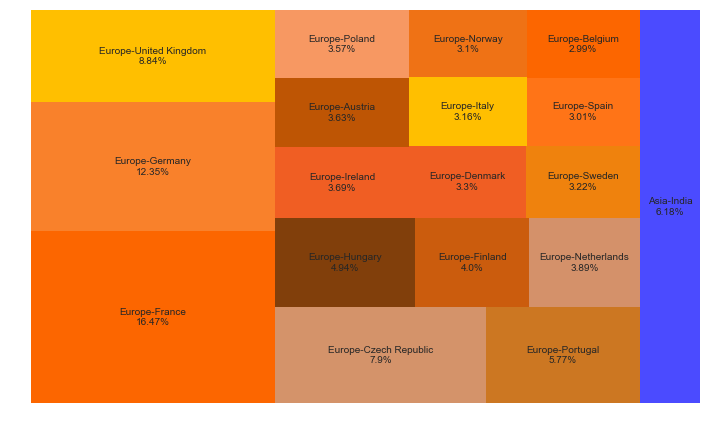

In [0]:
colors=["#FC6600", "#F9812B", "#FFBF00", "#D4936A","#CC7722","#813F0B","#CB5C0D","#D4916A","#F05E23","#BE5504","#F79862","#F05E23","#EF820D","#FFBF00","#EF7215","#FF7417"]
DataM=data_ASE[data_ASE.Region=='Europe']
DataN=data_ASE[data_ASE.Region=='Asia']
plt.rcParams['figure.figsize'] = (12.0, 9.0)
gs = gridspec.GridSpec(2,2,width_ratios=[ 15,1.5],height_ratios=[15, 2],wspace=0.0)
ax1 = plt.subplot(gs[0])
ax1=squarify.plot(sizes=DataM['R_sales'], label=DataM['Region']+'-'+DataM['Country']+'\n'+DataM['Percentage']+'%',color=colors )
plt.axis('off')
ax2 = plt.subplot(gs[1])
ax2 =squarify.plot(sizes=[0.1], label=DataN['Region']+'-'+DataN['Country']+'\n'+DataN['Percentage']+'%', alpha=.7,color="blue" )
plt.axis('off')
plt.show(ax1,ax2)

## Time Series Plot

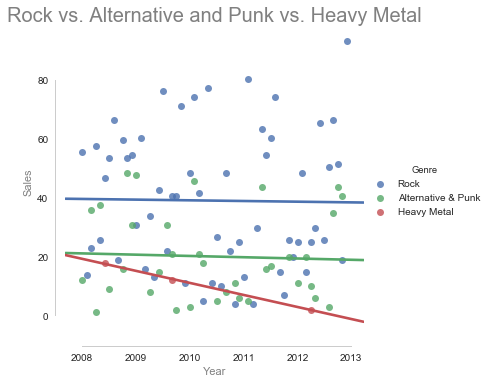

In [0]:
sns.set_style("whitegrid", {'axes.grid' : False})  ## This commands helps in avoding the grid lines

plt.rcParams['figure.figsize'] = (10, 10)
ax=sns.lmplot(x='order', y='Sales', hue='Genre', data=df_3genres_summary, ci=None)
plt.title('Rock vs. Alternative and Punk vs. Heavy Metal', size=20,color="Grey")
plt.xlabel('Year',color="Grey")
plt.ylabel('Sales',color="Grey")
ax.set(xticks=np.arange(0,71,12), xticklabels=[2008, 2009, 2010, 2011, 2012, 2013])
sns.despine(offset=10, trim=True); ## This trims the display frames



## countplot


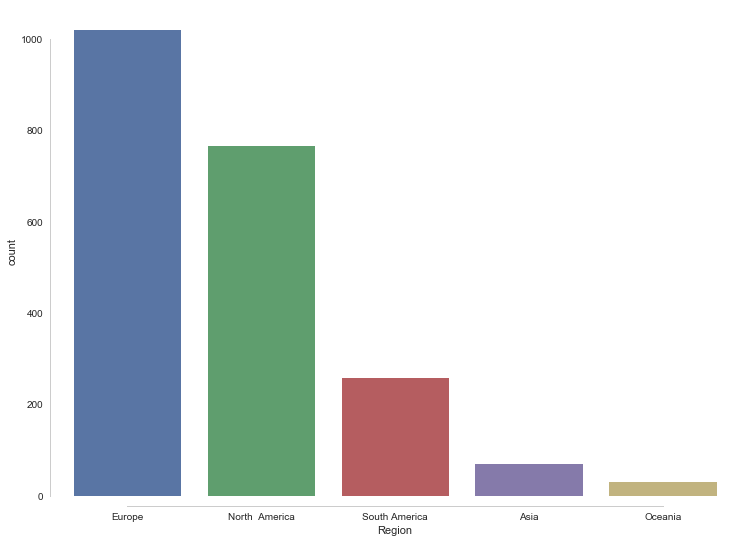

In [0]:
sns.set_style("whitegrid", {'axes.grid' : False})  ## This commands helps in avoding the grid lines

sns.countplot(data=df, x='Region', order=df.Region.value_counts().index)

sns.despine(offset=10, trim=True); ## This trims the display frames